In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_excel('~/Downloads/house01.xls')
df = df[df['COD_OBL'] == 'Lviv'][['TOTALEXP', 'TOTALRES', 'STOTAL']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 1880 to 2402
Data columns (total 3 columns):
TOTALEXP    523 non-null float64
TOTALRES    523 non-null float64
STOTAL      523 non-null float64
dtypes: float64(3)
memory usage: 16.3 KB


In [4]:
X = df[['TOTALRES', 'STOTAL']]
Y = df['TOTALEXP']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

/home/andrey/PycharmProjects/statlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TOTALEXP   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     447.0
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          1.13e-113
Time:                        20:34:59   Log-Likelihood:                -4888.7
No. Observations:                 523   AIC:                             9783.
Df Residuals:                     520   BIC:                             9796.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1888.7030    321.086      5.882      0.000    1257.918    2519.488
TOTALRES       0.9474      0.033     28.751      0.000       0.883       1.012
STOTAL        -6.7378      4.933     -1.366      0.173     -16.428       2.953
==============================================================================
Omnibus:                      264.460   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2976.996
Skew:                           1.934   Prob(JB):                         0.00
Kurtosis:                      14.030   Cond. No.                     2.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

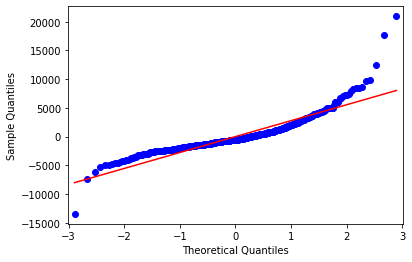

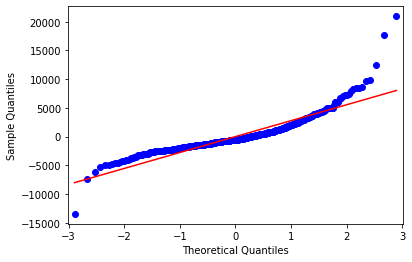

In [5]:
qqplot(results.resid, line='s')

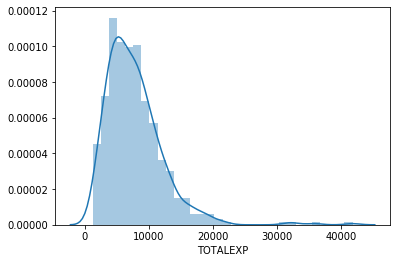

In [6]:
sns.distplot(df['TOTALEXP'])

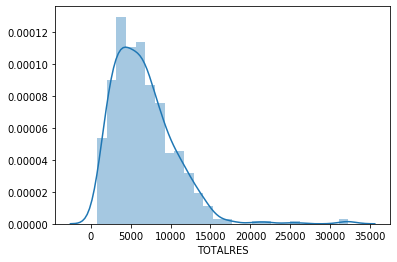

In [7]:
sns.distplot(df['TOTALRES'])

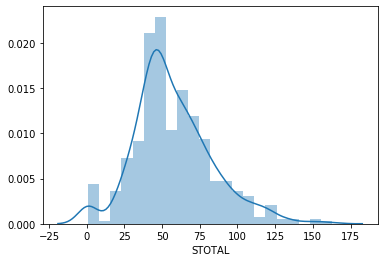

In [8]:
sns.distplot(df['STOTAL'])

In [9]:
df['LogTOTALRES'] = np.log(df['TOTALRES'])
df['LogTOTALEXP'] = np.log(df['TOTALEXP'])

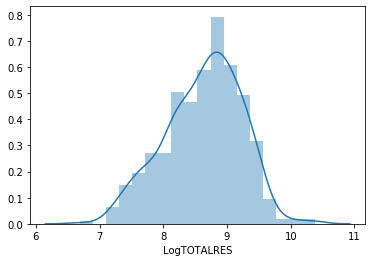

In [10]:
sns.distplot(df['LogTOTALRES'])

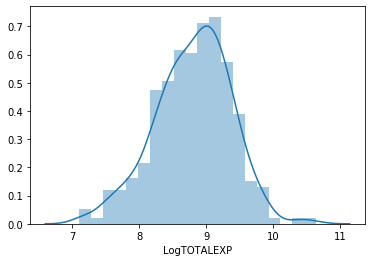

In [11]:
sns.distplot(df['LogTOTALEXP'])

In [13]:
X = df[['LogTOTALRES', 'STOTAL']]
Y = df['LogTOTALEXP']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LogTOTALEXP   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     639.8
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          6.58e-141
Time:                        20:38:29   Log-Likelihood:                -121.50
No. Observations:                 523   AIC:                             249.0
Df Residuals:                     520   BIC:                             261.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8426      0.198      9.301      0.000       1.453       2.232
LogTOTALRES     0.8112      0.024     33.871      0.000       0.764       0.858
STOTAL         -0.0007      0.001     -1.258      0.209      -0.002       0.000
==============================================================================
Omnibus:                       82.159   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.218
Skew:                           0.828   Prob(JB):                     4.95e-42
Kurtosis:                       5.447   Cond. No.                         947.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

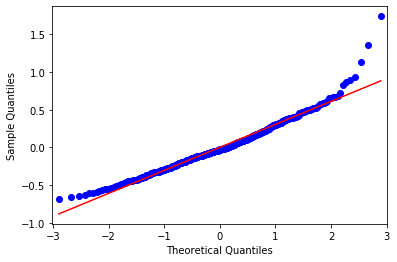

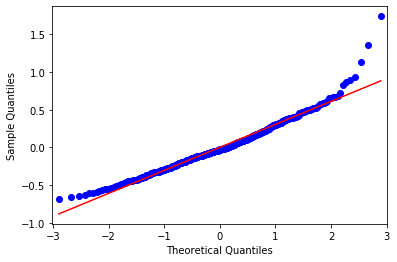

In [14]:
qqplot(results.resid, line='s')

In [15]:
plt.rcParams['figure.figsize'] = (10,10)

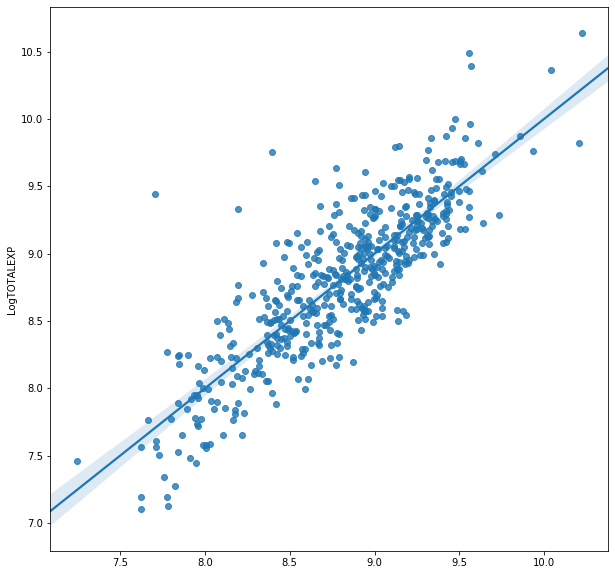

In [17]:
sns.regplot(results.fittedvalues, df['LogTOTALEXP'])

Висновок:
lnTOTALEXP = 1.8426 + 0.8112 * lnTOTALRES - 0.0007 * STOTAL + eps, eps~=Norm